# B-Splines Generation Code notebook
The following notebook contains the functions and values used to generate the B-Spline figures shown in the report

In [2]:
from math import *
import numpy as np
from operator import add
import matplotlib.pyplot as plt
import time

## Function to generate coefficients from the knots

In [3]:
def coef(i,j,knots,t):
	if j==0:
		if(t>=knots[i] and t< knots[i+1]):
			return 1
		else :
			return 0
	else:
		c1=coef(i,j-1,knots,t)
		c2=coef(i+1,j-1,knots,t)
		try:
			t1=float(t-knots[i])/knots[i+j]-knots[i]
		except ZeroDivisionError:
			t1=0
		try:
			t2=float(knots[i+j+1]-t)/knots[i+j+1]-knots[i+1]
		except ZeroDivisionError:
			t2=0
		t3=t1*c1+t2*c2
		return t3

## Function to generate knots

In [4]:
'''
N+1 control points P1 to P N+1 
Order K degree K-1
knots length N+K+1

'''
def Gen_Knots(n,k,knots,start,constant):
    num_of_knots = n+k+1
    cur = start
    for i in range(1, num_of_knots+1):
        if i<k :
            knots.append(cur)
        elif k< i < n+2 :
            cur += constant
            knots.append(cur)
        else:
            knots.append(cur)
    return knots




In [5]:
def gen_coeff_points(t1,n):
  co=[]
  for t in t1:
	  temp=[]
	  for i in range(n):
		  temp1=coef(i,k,knots,t)
		  temp.append(temp1)
	  co.append(temp)
  co=np.array(co)
  co = co[:-1]
  return co

In [6]:
k = 3
control_points = np.asarray([[-4,-4],[-1,4],[2,-4],[4,4]])
# control_points = np.asarray([[8,7],[4,6],[4,15],[10,12]]) #Uncomment this line to get a different curve
n=len(control_points)
knots = []
knots = Gen_Knots(n,k+1,knots,0,1)
t1 = np.linspace(knots[0],knots[-1],200) # Parameter t to plot the curve
co = gen_coeff_points(t1,n) # Generate the coefficients for each of these points

In [7]:
x_cord = []
y_cord = []

for i in co:
    tempx = np.sum(np.multiply(i,control_points[:,0]))  #Basis*control points
    tempy = np.sum(np.multiply(i,control_points[:,1]))
    x_cord.append(tempx)
    y_cord.append(tempy)

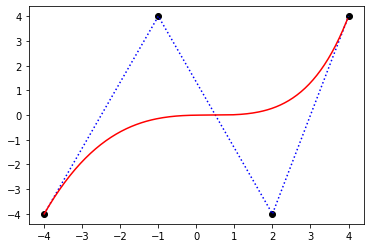

In [8]:
plt.plot(control_points[:,0],control_points[:,1],'ok')
plt.plot(control_points[:,0],control_points[:,1],':b')
plt.plot(x_cord,y_cord,'r')


# NURBS 

Weights are assigned for each Control Point

Increasing weights will pull the curve closer to point and vice versa



In [9]:
def get_values(control_points,weights,n,knots,t1):
  x_cord = []
  y_cord = []
  for t in t1[:-2]:
    total_weight = 0
    for i in range(n):
      temp = coef(i,k,knots,t)*weights[i]
      total_weight+=temp
    if(total_weight==0):
      total_weight=1
    x_=0
    y_=0
    for point,r,i in zip(control_points,weights,range(n)):
      temp = coef(i,k,knots,t)
      x = point[0].astype(np.float32)
      x = x* temp *r 
      x = x / total_weight
      x_+=x

      y = point[1].astype(np.float32)
      y = y* temp *r 
      y = y / total_weight
      y_+=y

    x_cord.append(x_)
    y_cord.append(y_)
  return [x_cord,y_cord]



In [10]:
# Necessary values for calculation
control_points = np.asarray([[-4,-4],[-1,4],[2,-4],[4,4]])
n = len(control_points)
knots = []
knots = Gen_Knots(n,k+1,knots,0,1)
t1 = np.linspace(knots[0],knots[-1],200)
weights = [1,3,1,1]

In [11]:
x_ = []
y_ = []
for i in range(1,6):
    weights = [1,i,1,1]
    [x,y] = get_values(control_points,weights,n,knots,t1)
    x_.append(x)
    y_.append(y)


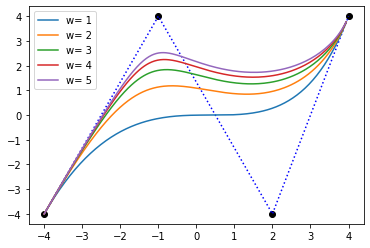

In [15]:
plt.plot(control_points[:,0],control_points[:,1],'ok')
plt.plot(control_points[:,0],control_points[:,1],':b')
for i in range(len(x_)):
  curve = plt.plot(x_[i],y_[i],label = 'w= %s'%(i+1))
plt.legend()
plt.show()